In [13]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

base_dir = os.getcwd()
model_path = os.path.join(base_dir, "models", "5.h5")

# Load the model
model = tf.keras.models.load_model(model_path)

CLASS_NAMES = ['Blast', 'Blight', 'Brownspot', 'Tungro']

# Load and preprocess the image
image_path = os.path.join(base_dir, "Test_Images", "blight", "bacterial-leaf-blight-2.JPG")
img = Image.open(image_path)
img = np.array(img.resize((224,224)))
img = np.expand_dims(img, axis=0)  # add batch dimension

# Make a prediction
pred = model.predict(img)
print(pred[0])
CLASS_NAMES[np.argmax(pred[0])]

1/1 [==============================] - 0s 76ms/step
[7.3358420e-13 1.0000000e+00 1.5314876e-14 4.4311300e-16]


'Blight'

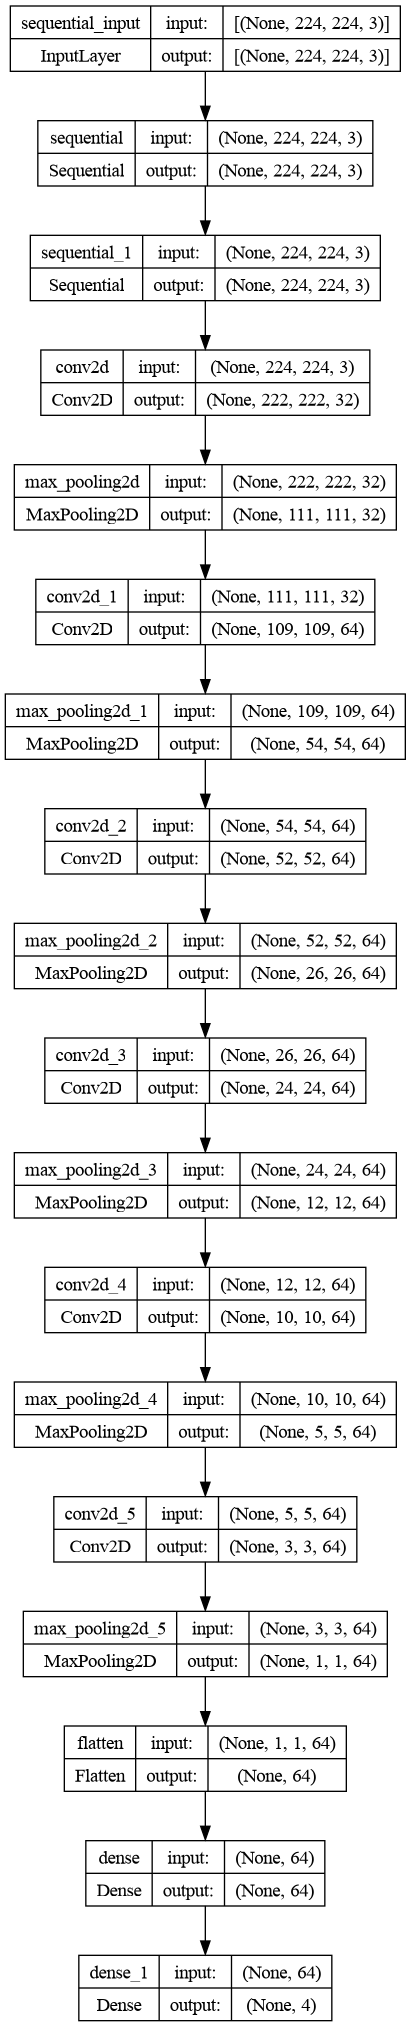

In [15]:
# Visual Representation of all the layers of the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


1/1 [==============================] - 0s 84ms/step
Layer 1: shape = (1, 222, 222, 32)


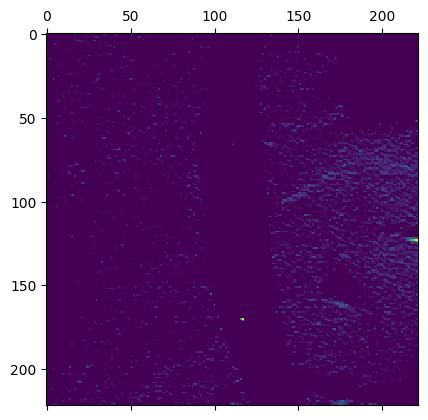

Layer 2: shape = (1, 109, 109, 64)


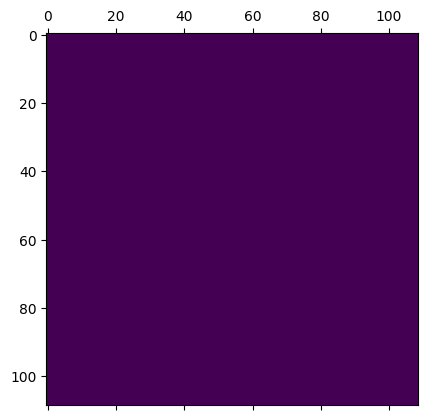

Layer 3: shape = (1, 52, 52, 64)


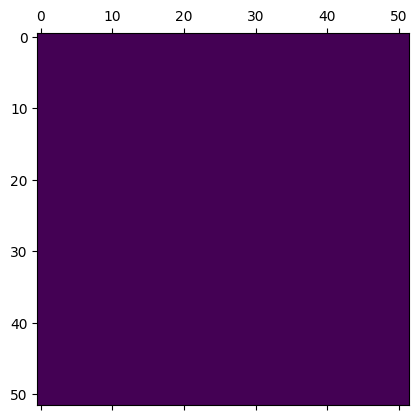

Layer 4: shape = (1, 24, 24, 64)


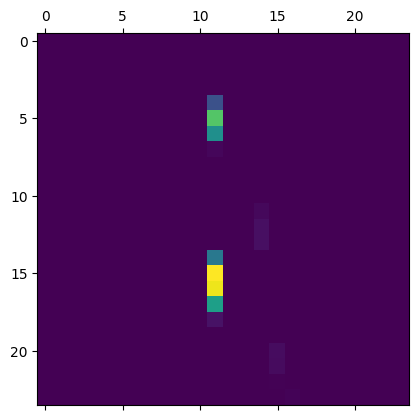

Layer 5: shape = (1, 10, 10, 64)


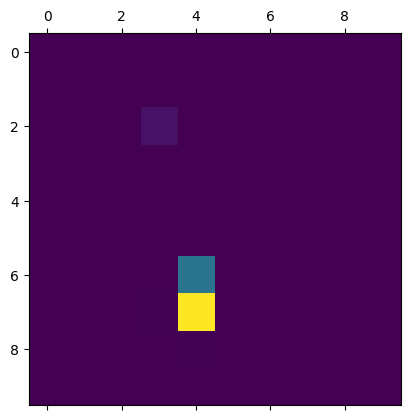

Layer 6: shape = (1, 3, 3, 64)


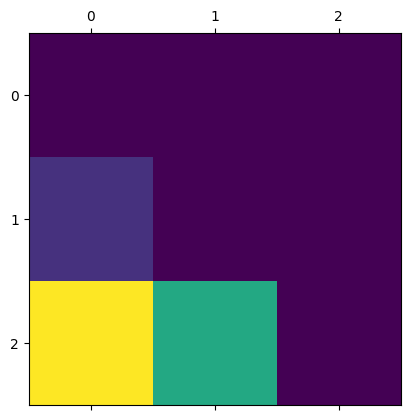

In [17]:
# Create a new model that outputs the feature maps of each Conv2D layer
from matplotlib import pyplot as plt


layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Load an image and get its predictions
image_path = os.path.join(base_dir, "Test_Images", "blast", "blast-leaf-2.jpg")
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

# Get the feature maps of each Conv2D layer for the input image
activations = activation_model.predict(x)

# Visualize the feature maps of each Conv2D layer
for i, activation in enumerate(activations):
    print(f'Layer {i + 1}: shape = {activation.shape}')
    plt.matshow(activation[0, :, :, 0], cmap='viridis') # plot the first channel of the first image in the batch
    plt.show()

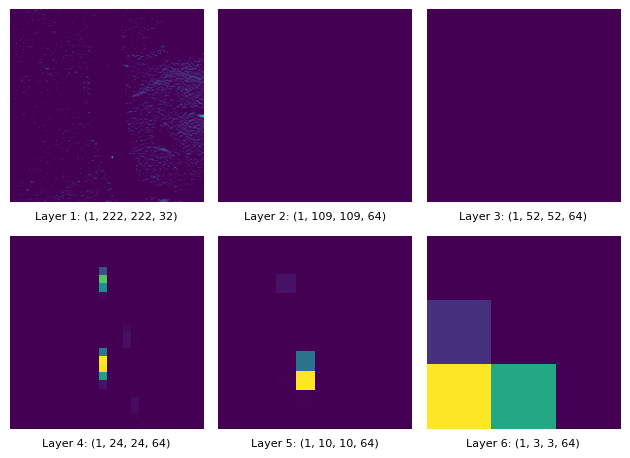

In [18]:
from matplotlib import pyplot as plt
import math

# Calculate the number of rows and columns needed for the grid
num_images = min(len(activations), 6)
num_rows = math.ceil(num_images / 3)
num_cols = min(num_images, 3)

# Create a grid of subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols)

# Iterate over the feature maps of each Conv2D layer
for i, activation in enumerate(activations[:6]):
    # Calculate the row and column index in the grid
    row = i // num_cols
    col = i % num_cols

    # Plot the feature map in the corresponding subplot
    ax = axes[row, col]
    ax.imshow(activation[0, :, :, 0], cmap='viridis')
    ax.axis('off')

    # Add layer shape as title at the bottom
    ax.set_title(f'Layer {i + 1}: {activation.shape}', fontsize=8, pad=2, y=-0.1)

# Remove the empty subplots in the last row, if any
if num_images < 6:
    for col in range(num_images, 3):
        fig.delaxes(axes[num_rows - 1, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of feature maps
plt.show()
